In [5]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [16]:
Calculating_cuttoff_homo <- function(vcf, WGS_variants_path){
    WGS_var<-read.table(file=WGS_variants_path, header=T, row.names=NULL)
    #load potential heterozygous variants
    WGS_homo_var <- subset(WGS_var, Category == "Alt_Homo")
    print(paste("number of rows of potential homo: ", nrow(WGS_homo_var)))

    # overlaping variants between WGS potential variants and vcf data
    overlap <- subset(vcf, vcf$CHROM.POS.REF.ALT %in% WGS_homo_var$CHROM.POS.REF.ALT)
    head(overlap)
    print(paste("number of rows of overlapping homo between WGS potential variants and vcf data: ",nrow(overlap)))

    # Generate histogram for the MAF upper and lower CI of potential homo variants 
    pdf(file="potential_homo_var_MAF_hist.pdf",height=6,width=7)
    hist(overlap$LOWER_CI, breaks = 50, xlim=c(0,1))
    lines(density(overlap$LOWER_CI), col="blue", lwd=2)
    abline(v=quantile(overlap$LOWER_CI, 0.95, na.rm=TRUE), col="red")
    dev.off()
    
    # lower limit of AF to define 'mosaic variant
    print(quantile(overlap$LOWER_CI, 0.95, na.rm=TRUE))
    }

filtering_error_prone_variants<- function(data) {
    filtered <- data[ data$REPEAT_MASKER==0 
               & data$SEGDUP==FALSE 
               & data$HOMOPOLYMER==FALSE 
               & data$DINUCLEOTIDE==FALSE 
               & data$NEAR_INDEL==FALSE 
               & data$UCSC_RPMSK=='pass',]
    return(filtered)
    }


# Set cut off of AF

In [17]:
#filtered<-read.table(file="./final_summary_anno3.txt",header=T)
filtered<-read.table(file="./7614_final_summary_anno3.txt",header=T)

In [18]:
#remove JGG for cutoff calculation
filtered_noJGG<-filtered[!(filtered$ID %in% c("JGG","JGG-bulk","JGG-sorted")),]
filtered_noJGG<-filtering_error_prone_variants(filtered_noJGG)

In [19]:
Calculating_cuttoff_homo(filtering_error_prone_variants(filtered_noJGG), "./7614-variant-list.txt")

[1] "number of rows of potential homo:  30"
[1] "number of rows of overlapping homo between WGS potential variants and vcf data:  9222"


ERROR: Error in density.default(overlap$LOWER_CI): 'x' contains missing values


[1] "number of rows of potential homo:  30"


,ID,CHROM,POS,REF,ALT,CHROM.POS.REF.ALT,ANNO,GENE,GNOMAD_FREQ,REPEAT_MASKER,⋯,Cell_Type,Location,AntPost,DorVen,Organ,Note,Bulk_main,Sort_main,CTX_BG_HIP_relationship,Organ_main
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
6,7614-B-L-T,1,23121461,C,G,1-23121461-C-G,intronic,EPHB2,0.7944,0,⋯,Bulk,NA,Post,Ven,CTX,LARGE,1,0,0,0
27,7614-B-L-T,1,114686316,T,C,1-114686316-T-C,intronic,SYT6,0.7316,0,⋯,Bulk,NA,Post,Ven,CTX,LARGE,1,0,0,0
48,7614-B-L-T,1,202125899,A,G,1-202125899-A-G,intronic,PTPN7,0.7171,0,⋯,Bulk,NA,Post,Ven,CTX,LARGE,1,0,0,0
74,7614-B-L-T,2,20368196,A,G,2-20368196-A-G,intergenic,"LAPTM4A(dist=116407),SDC1(dist=32362)",0.7132,0,⋯,Bulk,NA,Post,Ven,CTX,LARGE,1,0,0,0
117,7614-B-L-T,2,121805078,A,G,2-121805078-A-G,intergenic,"GLI2(dist=54849),TFCP2L1(dist=169086)",0.7008,0,⋯,Bulk,NA,Post,Ven,CTX,LARGE,1,0,0,0
168,7614-B-L-T,3,54659057,A,G,3-54659057-A-G,intronic,CACNA2D3,0.7707,0,⋯,Bulk,NA,Post,Ven,CTX,LARGE,1,0,0,0


[1] "number of rows of overlapping homo between WGS potential variants and vcf data:  9222"


Warning message in sqrt(overlap$LOWER_CI):
“NaNs produced”


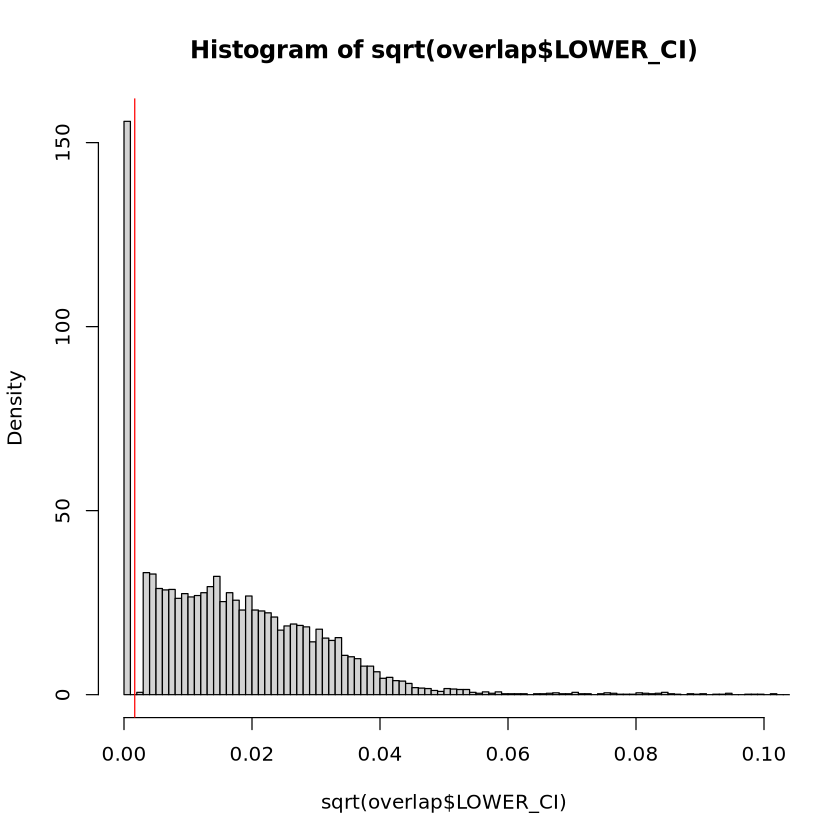

In [52]:
WGS_variants_path<-"./7614-variant-list.txt"
vcf<-filtered_noJGG

WGS_var<-read.table(file=WGS_variants_path, header=T, row.names=NULL)
    #load potential heterozygous variants
    WGS_homo_var <- subset(WGS_var, Category == "Alt_Homo")
    print(paste("number of rows of potential homo: ", nrow(WGS_homo_var)))

    # overlaping variants between WGS potential variants and vcf data
    overlap <- subset(vcf, CHROM.POS.REF.ALT %in% WGS_homo_var$CHROM.POS.REF.ALT)
    head(overlap)
    print(paste("number of rows of overlapping homo between WGS potential variants and vcf data: ",nrow(overlap)))

    # Generate histogram for the MAF upper and lower CI of potential homo variants 
    #pdf(file="potential_homo_var_MAF_hist.pdf",height=6,width=7)
    hist(sqrt(overlap$LOWER_CI),prob=TRUE,breaks = 1000, xlim=c(0,0.1))
    #lines(density(na.omit(overlap$LOWER_CI),width=0.05), col="blue", lwd=1)
    abline(v=quantile(overlap$LOWER_CI, 0.95, na.rm=TRUE), col="red")
    #dev.off()